
# PORT-CITY SIMULATION DATA - EXPERIMENTS POISSON


## Import Dependencies & Pickle Files





In [1]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import seaborn as sns

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -e /content/drive/MyDrive/TESE/src/quanttree/

Obtaining file:///content/drive/MyDrive/TESE/src/quanttree
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for quanttree (pyproject.toml) ... done
  Created wheel for quanttree: filename=quanttree-0.0.4-0.editable-py3-none-any.whl size=108191 sha256=d277f91761c8424441c4ac3e93f761a3948a196e5573ddc6513b1ecd9ea880ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-rwf1dsqb/wheels/99/ec/85/1673340f6631e76e5fa250045531248d77a9fed5a40b47df7c
Successfully built quanttree


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/TESE/src/quanttree/')

In [5]:
from quanttree import QT_EWMA, QuantTree
from quanttree.baselines import OnlineQuantTree, OnlineSPLL
from quanttree import utils

In [6]:
# Path to your script
module_path = '/content/drive/MyDrive/TESE/src/febagni_scripts.py'

# Load the module
spec = importlib.util.spec_from_file_location("febagni_scripts", module_path)
febagni_scripts = importlib.util.module_from_spec(spec)
spec.loader.exec_module(febagni_scripts)


In [7]:
def import_pickle(path):
  if os.path.exists(path):
    with open(path, 'rb') as f:
      print("Pickle file imported from: ", path)
      return pickle.load(f)
  else:
    print("File not found.")

In [10]:
def plot_distribution(scenario_0, scenario_1):
  num_variables = len(febagni_scripts.variable_names)

  fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables)) # Changed to num_variables x 1 subplot grid

  for v in range(num_variables):
      # Ensure data is 1D
      data_s0_temp = scenario_0[v, :]
      data_s1_temp = scenario_1[v, :]

      sns.kdeplot(data=data_s0_temp, ax=axes[v], label='Scenario 0', color='blue') # Indexing with v
      sns.kdeplot(data=data_s1_temp, ax=axes[v], label='Scenario 1', color='red') # Indexing with v

      axes[v].set_title(f"{febagni_scripts.variable_names[v]}") # Indexing with v
      axes[v].legend()

  plt.tight_layout()
  plt.show()

In [11]:
def plot_distribution_francia(scenario_0, scenario_1):
  num_variables = 3

  fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables)) # Changed to num_variables x 1 subplot grid

  for v in range(num_variables):
      # Ensure data is 1D
      data_s0_temp = scenario_0[v, :]
      data_s1_temp = scenario_1[v, :]

      sns.kdeplot(data=data_s0_temp, ax=axes[v], label='Scenario 0', color='blue') # Indexing with v
      sns.kdeplot(data=data_s1_temp, ax=axes[v], label='Scenario 1', color='red') # Indexing with v

      axes[v].set_title(f"{febagni_scripts.variable_names_francia[v]}") # Indexing with v
      axes[v].legend()

  plt.tight_layout()
  plt.show()

In [8]:
def plot_histograms(scenario_0, scenario_1):
    num_variables = len(febagni_scripts.variable_names)

    fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables))

    for v in range(num_variables):
        data_s0_temp = scenario_0[v, :]
        data_s1_temp = scenario_1[v, :]

        # Compute number of bins as the square root of unique values
        unique_values = np.unique(np.concatenate([data_s0_temp, data_s1_temp]))
        num_bins = max(1, int(np.sqrt(len(unique_values))))  # Ensure at least 1 bin

        axes[v].hist(data_s0_temp, bins=num_bins, alpha=0.5, label='Scenario 0', color='blue', histtype='step')
        axes[v].hist(data_s1_temp, bins=num_bins, alpha=0.5, label='Scenario 1', color='red', histtype='step')

        axes[v].set_title(f"{febagni_scripts.variable_names[v]}")
        axes[v].legend()

    plt.tight_layout()
    plt.show()

In [9]:
def plot_histograms_francia(scenario_0, scenario_1):
    num_variables = len(febagni_scripts.variable_names_francia)

    fig, axes = plt.subplots(num_variables, 1, figsize=(20, 5 * num_variables))

    for v in range(num_variables):
        data_s0_temp = scenario_0[v, :]
        data_s1_temp = scenario_1[v, :]

        # Compute number of bins as the square root of unique values
        unique_values = np.unique(np.concatenate([data_s0_temp, data_s1_temp]))
        num_bins = max(1, int(np.sqrt(len(unique_values))))  # Ensure at least 1 bin

        axes[v].hist(data_s0_temp, bins=num_bins, alpha=0.5, label='Scenario 0', color='blue', histtype='step')
        axes[v].hist(data_s1_temp, bins=num_bins, alpha=0.5, label='Scenario 1', color='red', histtype='step')

        axes[v].set_title(f"{febagni_scripts.variable_names_francia[v]}")
        axes[v].legend()

    plt.tight_layout()
    plt.show()

In [11]:
def add_gaussian_noise_selected(data, variables_to_modify, mean=0, std=0.001):
    """Adds Gaussian noise to selected variables in the dataset.

    Parameters:
    - data: NumPy array (shape: variables × samples)
    - variables_to_modify: List of variable indices to modify
    - mean: Mean of the Gaussian noise (default=0)
    - std: Standard deviation of the Gaussian noise (default=1)

    Returns:
    - Modified data with noise added to specified variables
    """
    noisy_data = data.copy()  # Copy to avoid modifying original data

    for v in variables_to_modify:
        noise = np.random.normal(loc=mean, scale=std, size=data[v, :].shape)
        noisy_data[v, :] += noise

    return noisy_data

In [17]:
def count_unique_values(scenario_0, scenario_1, variable_names):
    num_variables = len(variable_names)

    for v in range(num_variables):
        unique_s0_count = len(np.unique(scenario_0[v, :]))
        unique_s1_count = len(np.unique(scenario_1[v, :]))

        print(f"Variable: {variable_names[v]}")
        print(f"  Unique count in Scenario 0: {unique_s0_count}")
        print(f"  Unique count in Scenario 1: {unique_s1_count}")
        print("-" * 50)

In [10]:
path_directory = '/content/drive/MyDrive/TESE/data/preprocessed/sequential/'

for i in range(1, 13):
  path_s0_weekend = path_directory + "data_scenario2_poisson_weekend/data_s0_" + str(i) + ".pkl"
  path_s0_weekday = path_directory + "data_scenario2_poisson_feriale/data_s0_" + str(i) + ".pkl"
  path_s1_weekend = path_directory + "data_scenario2_alt_poisson_weekend/data_s1_" + str(i) + ".pkl"
  path_s1_weekday = path_directory + "data_scenario2_alt_poisson_feriale/data_s1_" + str(i) + ".pkl"

  if i == 1:
    s0_weekend = import_pickle(path_s0_weekend)
    s0_weekday = import_pickle(path_s0_weekday)
    s1_weekend = import_pickle(path_s1_weekend)
    s1_weekday = import_pickle(path_s1_weekday)
  else:
    s0_weekend = np.concatenate((s0_weekend, import_pickle(path_s0_weekend)), axis=1)
    s0_weekday = np.concatenate((s0_weekday, import_pickle(path_s0_weekday)), axis=1)
    s1_weekend = np.concatenate((s1_weekend, import_pickle(path_s1_weekend)), axis=1)
    s1_weekday = np.concatenate((s1_weekday, import_pickle(path_s1_weekday)), axis=1)

Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario2_poisson_weekend/data_s0_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario2_poisson_feriale/data_s0_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario2_alt_poisson_weekend/data_s1_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario2_alt_poisson_feriale/data_s1_1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario2_poisson_weekend/data_s0_2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario2_poisson_feriale/data_s0_2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequential/data_scenario2_alt_poisson_weekend/data_s1_2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/sequ

In [13]:
scenario_0 = febagni_scripts.create_multimodal_dataset(s0_weekday, s0_weekend, ratio=0.5)
scenario_0.shape

(21, 12000)

In [14]:
scenario_1 = febagni_scripts.create_multimodal_dataset(s1_weekday, s1_weekend, ratio=0.5)
scenario_1.shape

(21, 12000)

In [15]:
variables_to_modify = [4, 5, 10, 11, 16, 17, 20]
scenario_0 = add_gaussian_noise_selected(scenario_0, variables_to_modify)
scenario_1 = add_gaussian_noise_selected(scenario_1, variables_to_modify)

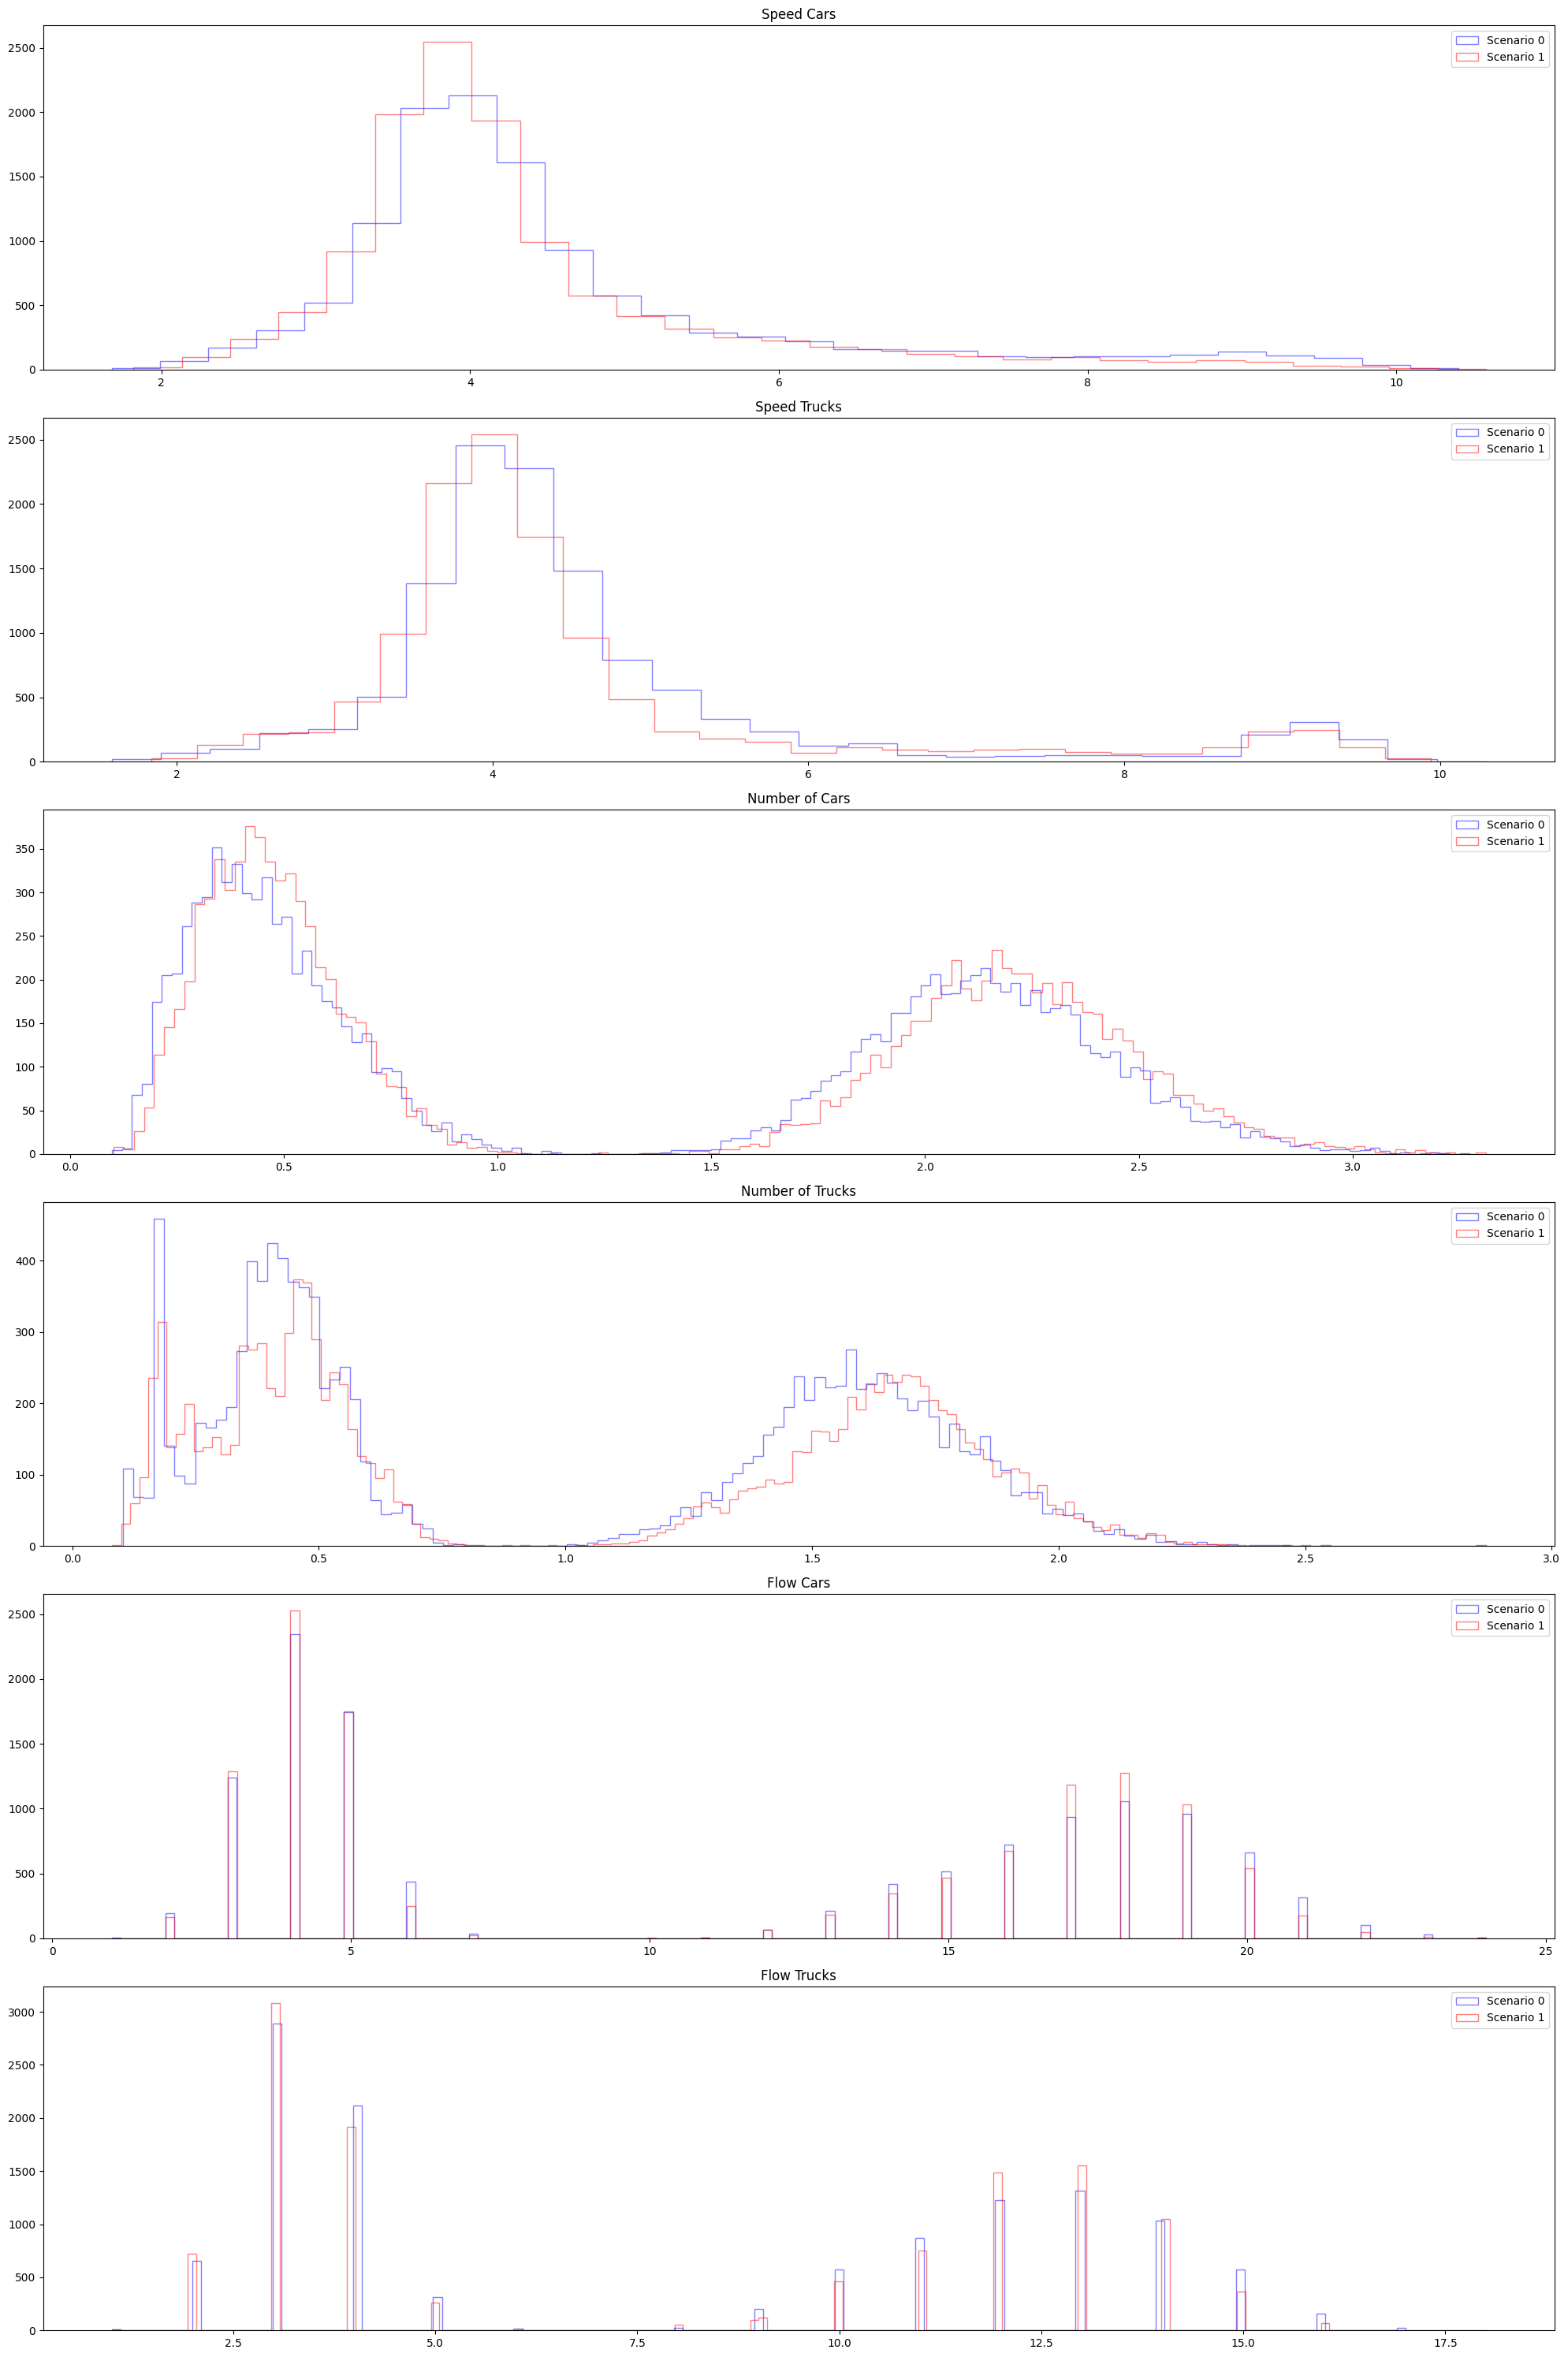

In [16]:
plot_histograms(scenario_0, scenario_1)

In [18]:
up_s0 = febagni_scripts.get_segment_data(scenario_0, "Elicoidale Upstream")
up_s1 = febagni_scripts.get_segment_data(scenario_1, "Elicoidale Upstream")

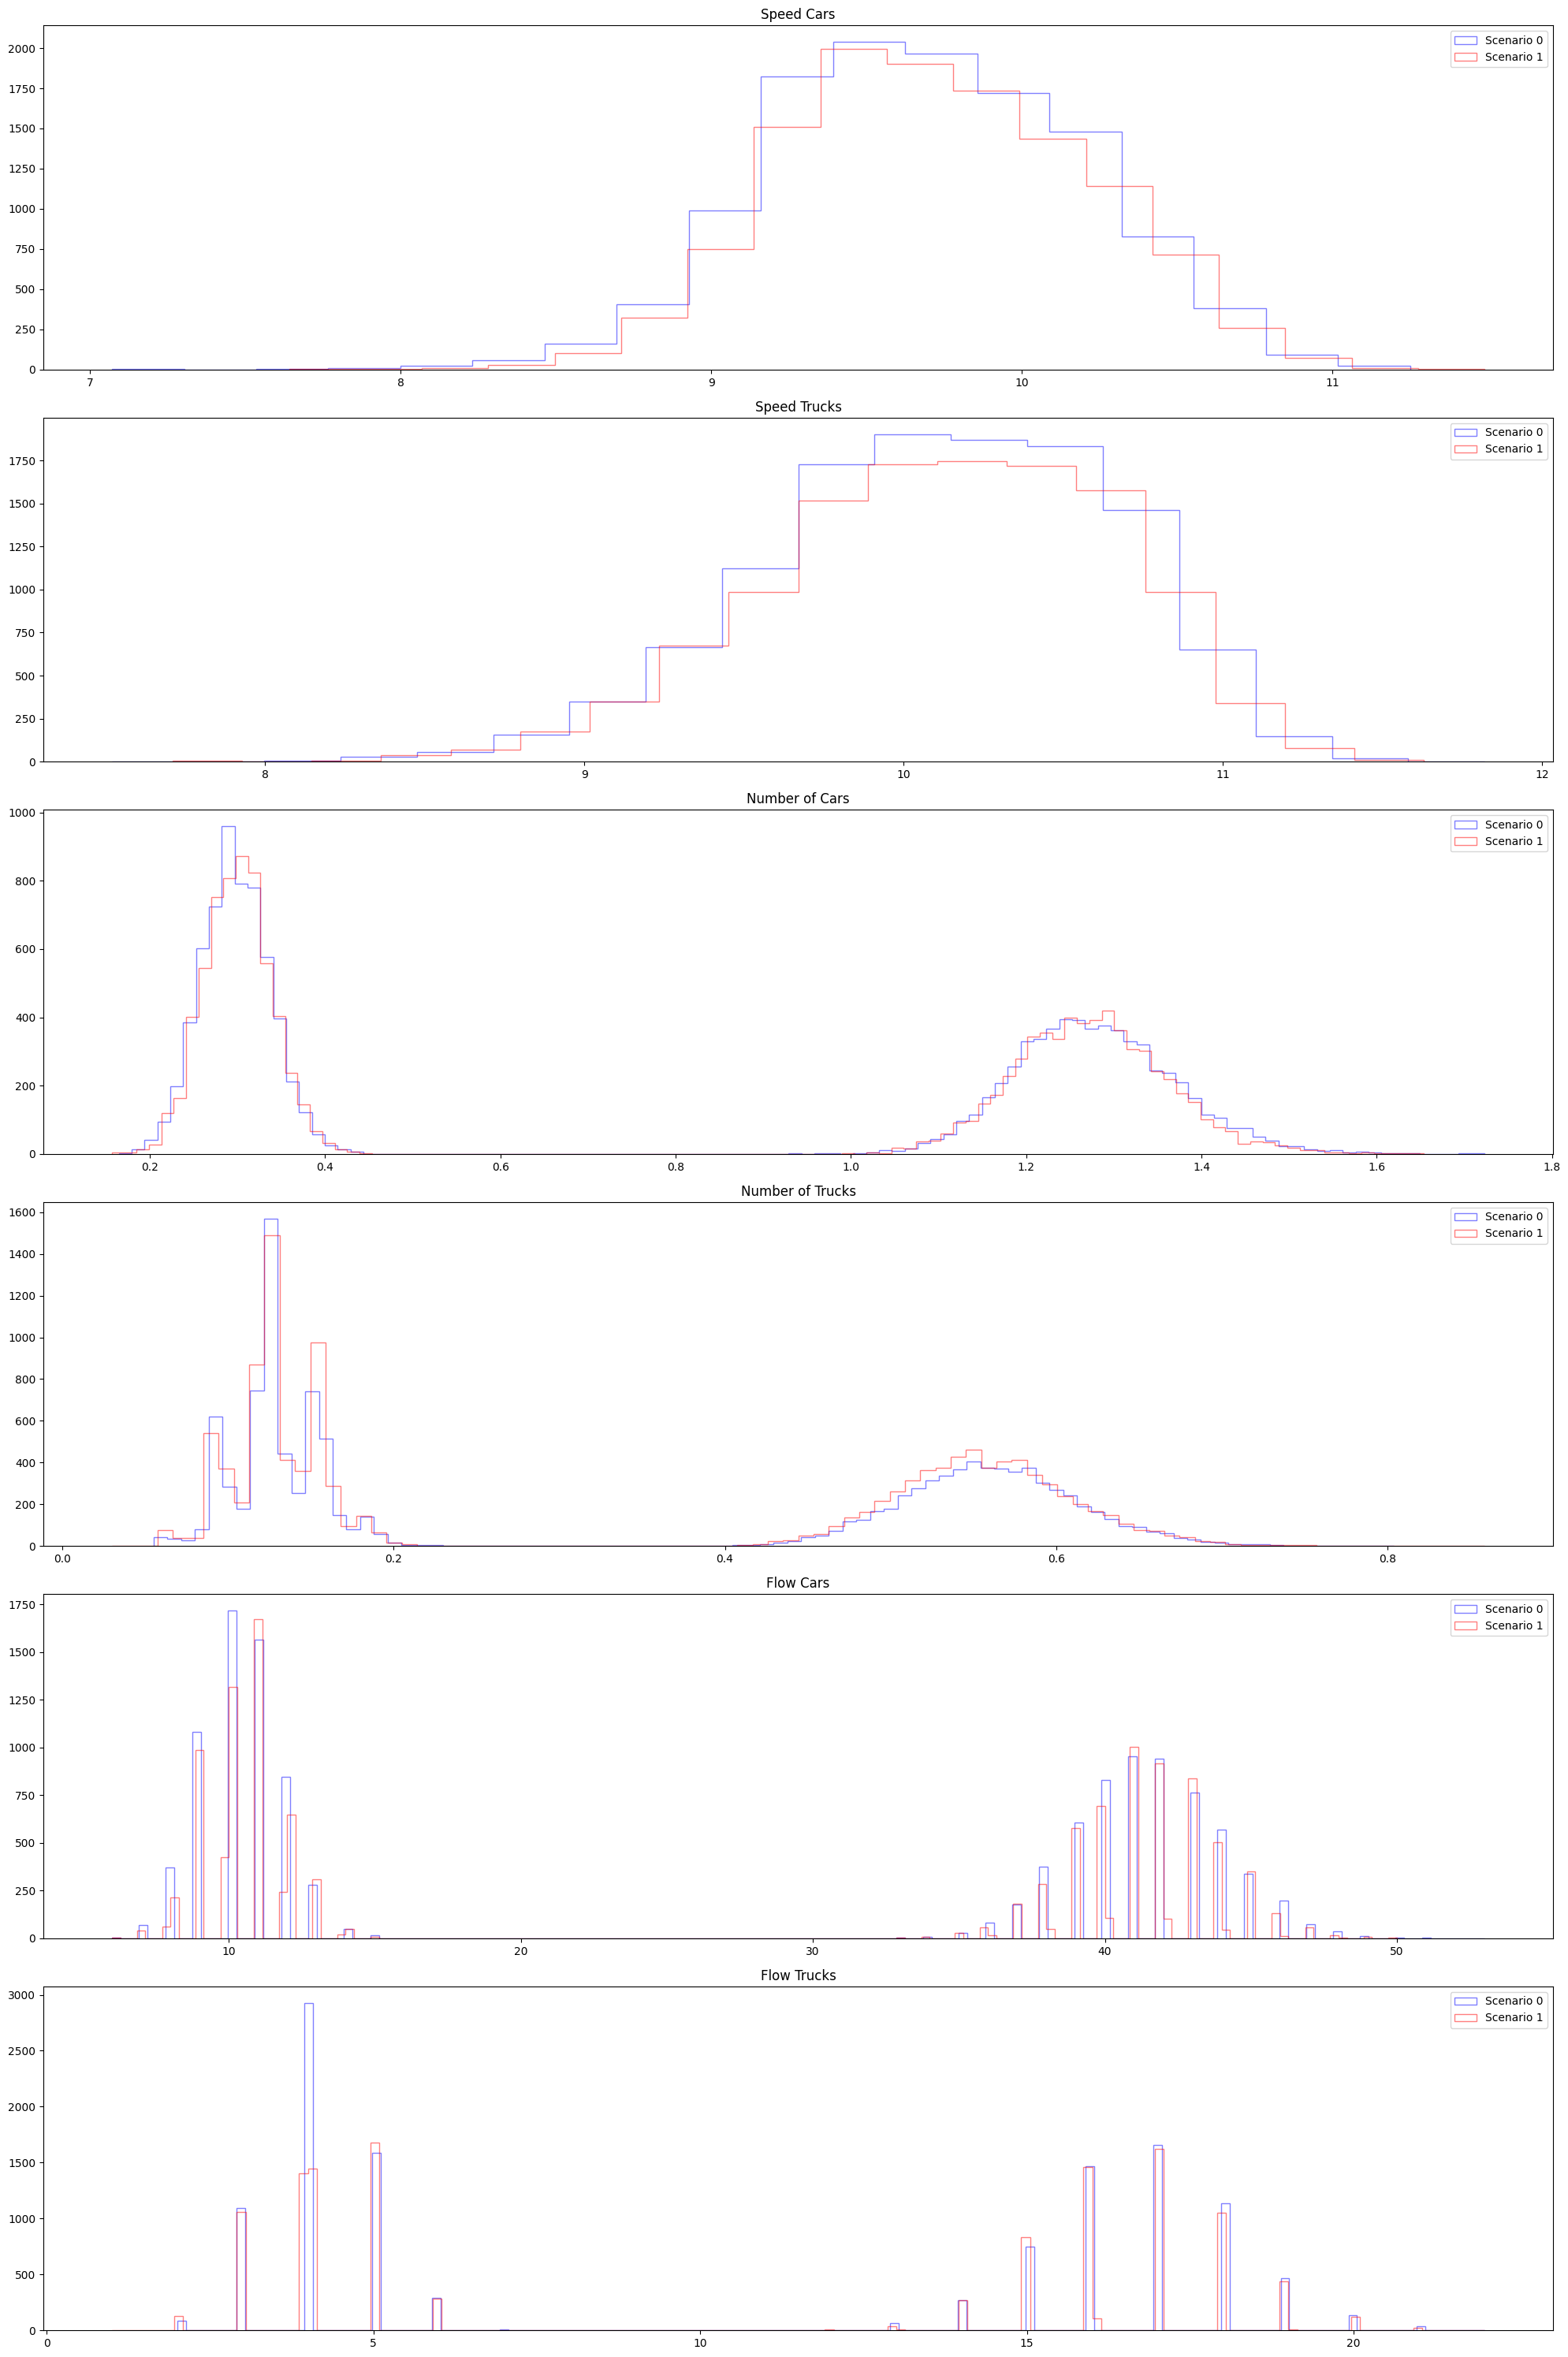

In [19]:
plot_histograms(up_s0, up_s1)

In [20]:
down_s0 = febagni_scripts.get_segment_data(scenario_0, "Elicoidale Downstream")
down_s1 = febagni_scripts.get_segment_data(scenario_1, "Elicoidale Downstream")

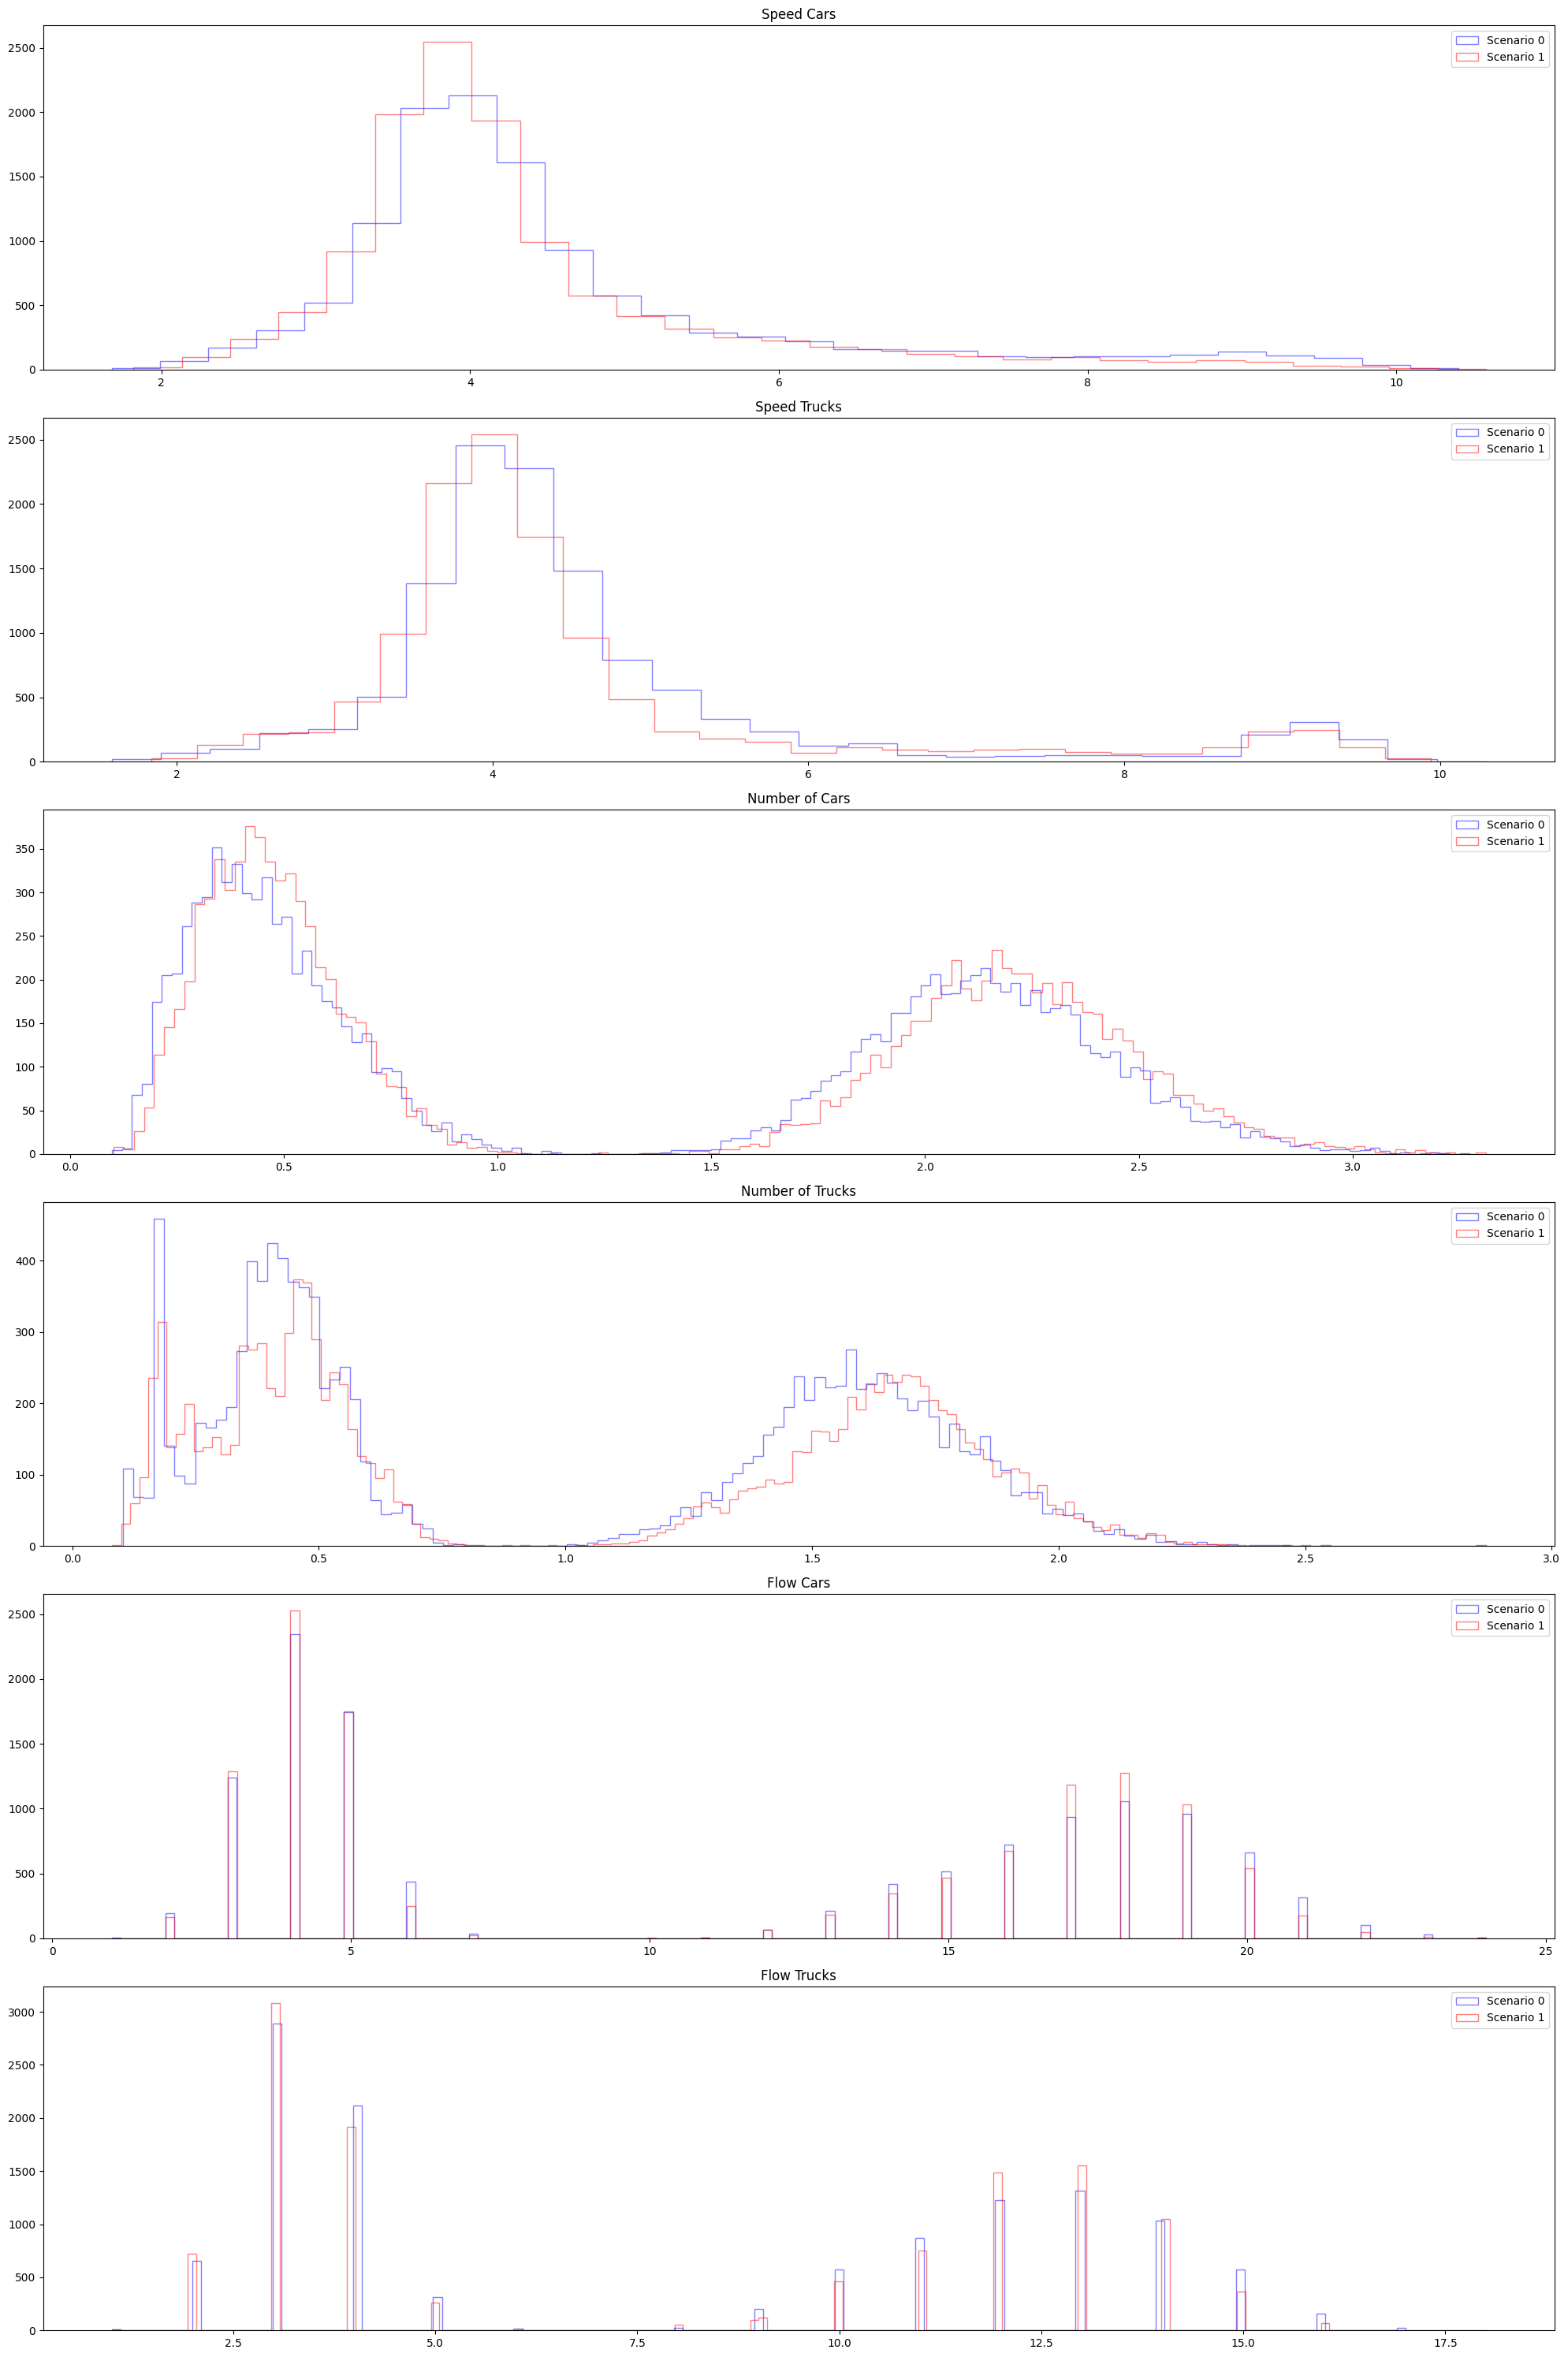

In [21]:
plot_histograms(down_s0, down_s1)

In [22]:
lungomare_s0 = febagni_scripts.get_segment_data(scenario_0, "Lungomare Canepa")
lungomare_s1 = febagni_scripts.get_segment_data(scenario_1, "Lungomare Canepa")

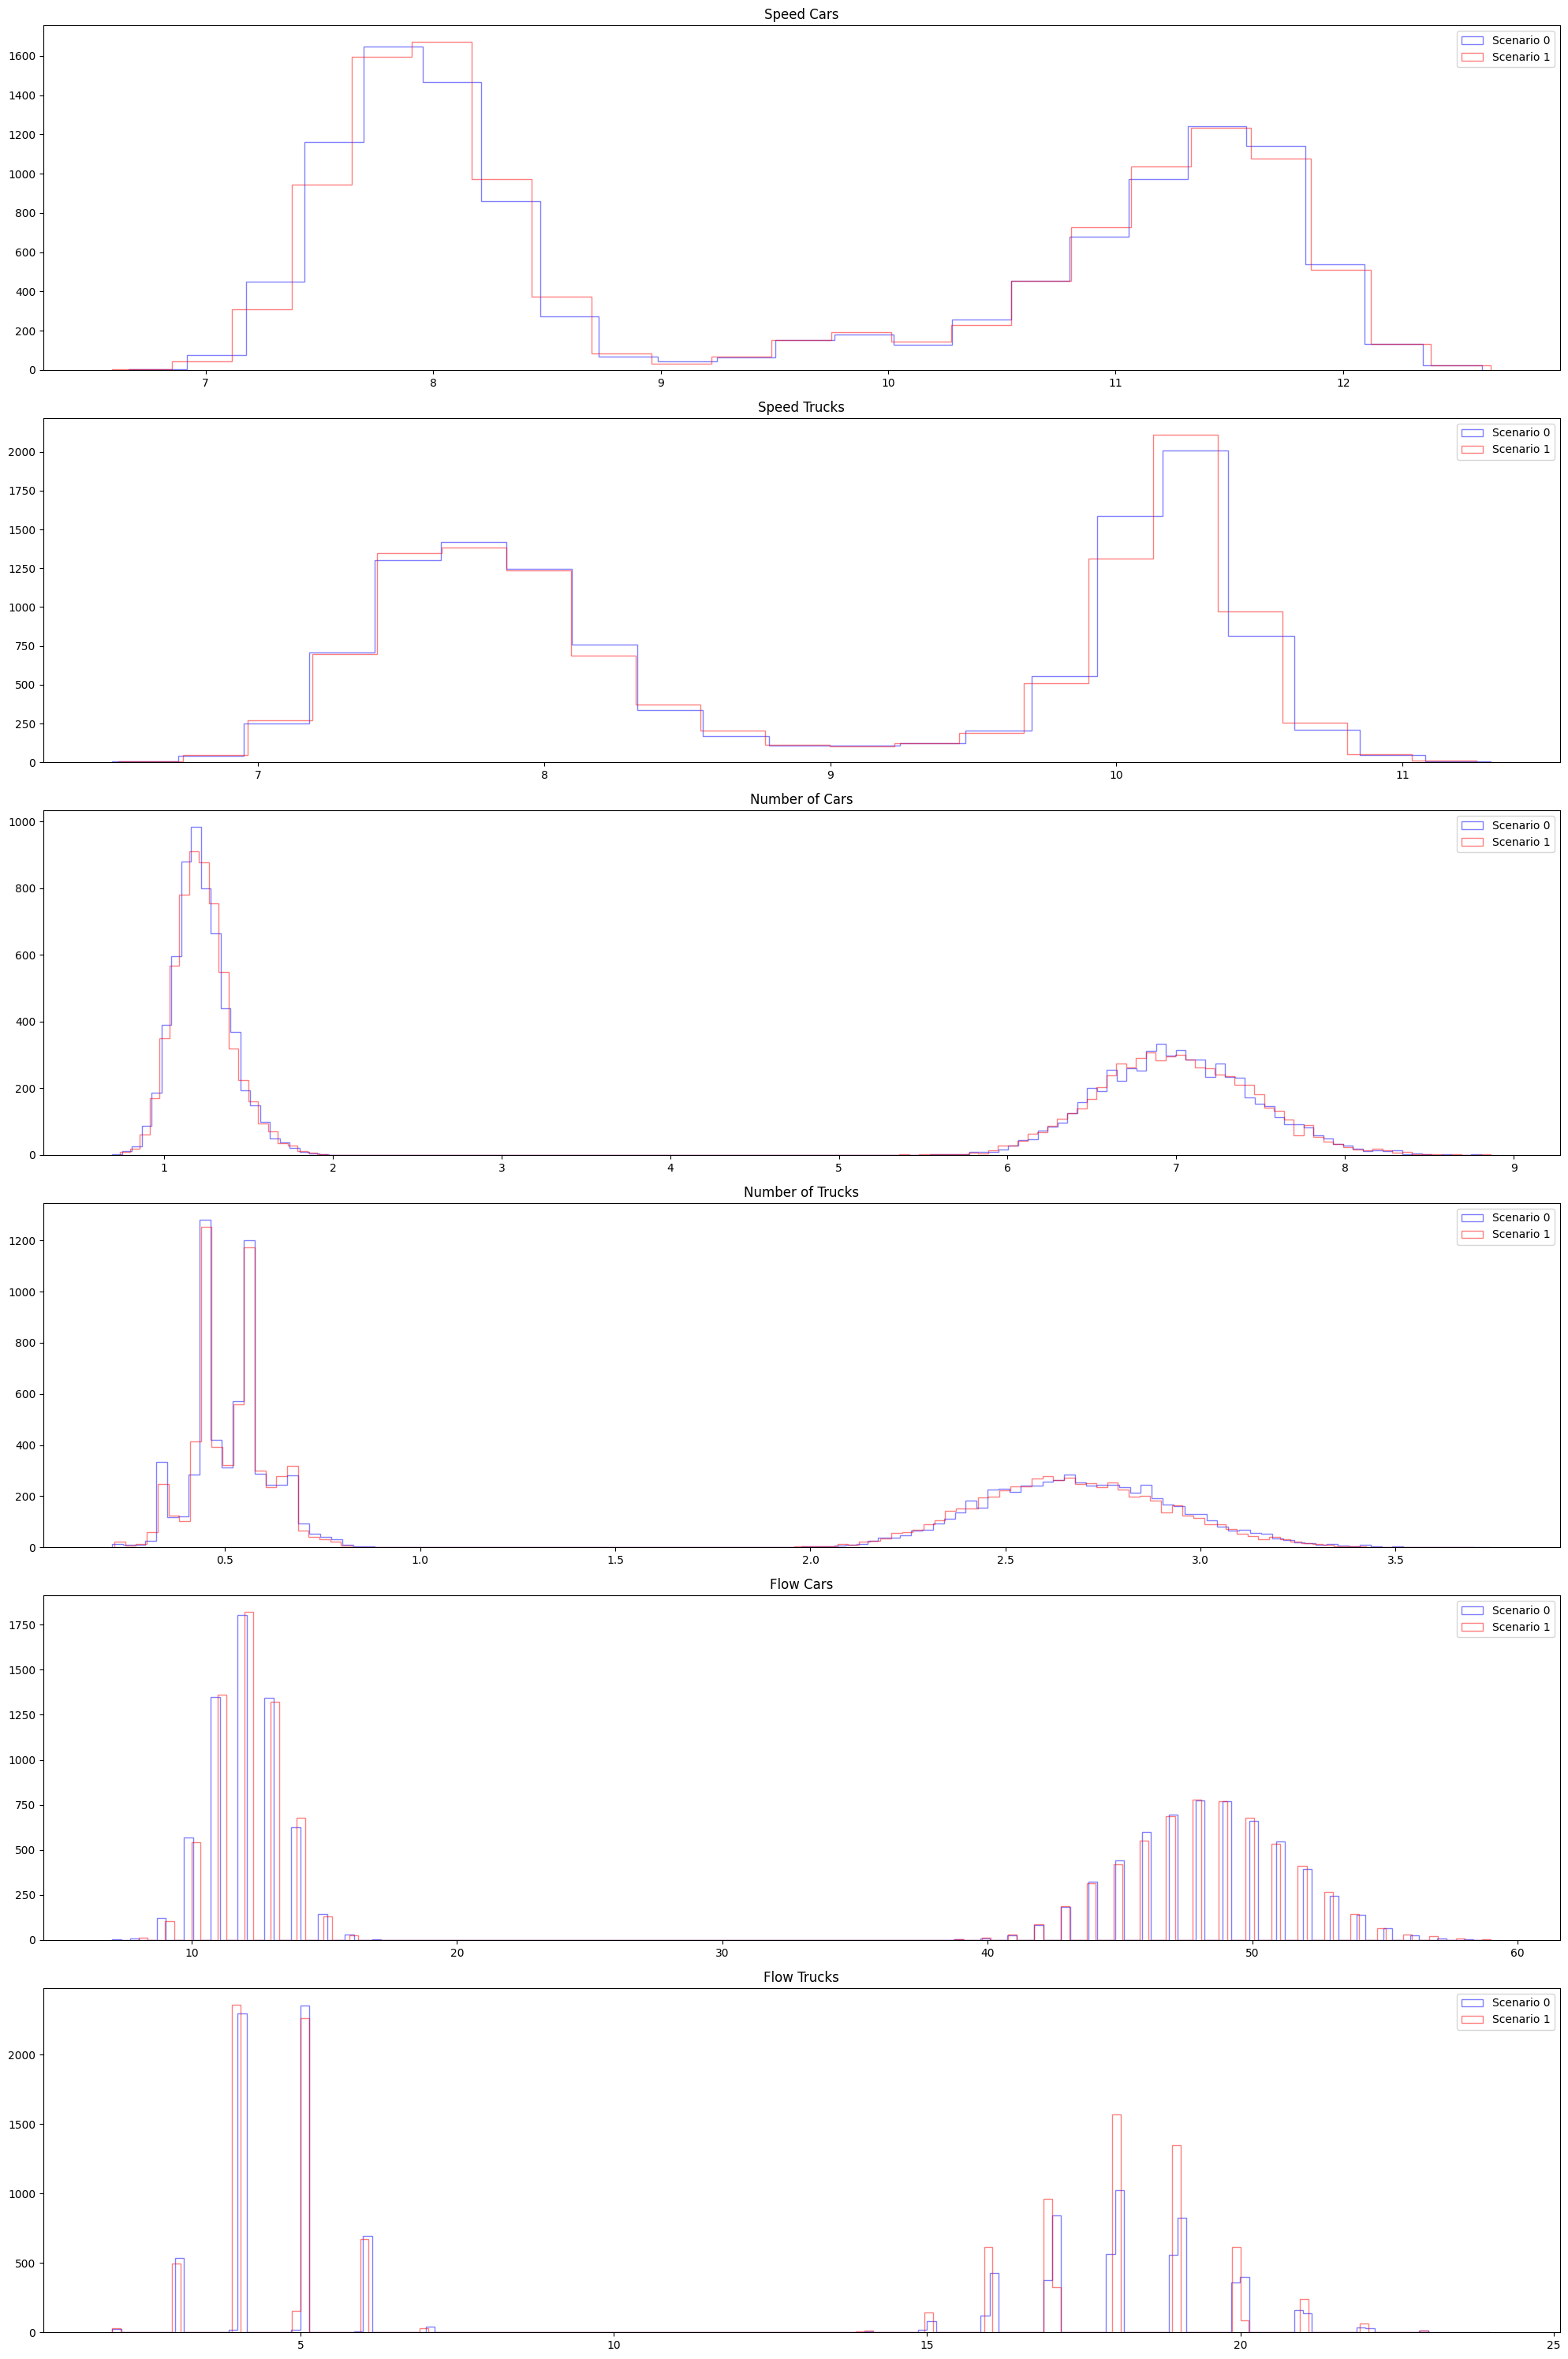

In [23]:
plot_histograms(lungomare_s0, lungomare_s1)

In [24]:
francia_s0 = febagni_scripts.get_segment_data(scenario_0, "Via di Francia")
francia_s1 = febagni_scripts.get_segment_data(scenario_1, "Via di Francia")

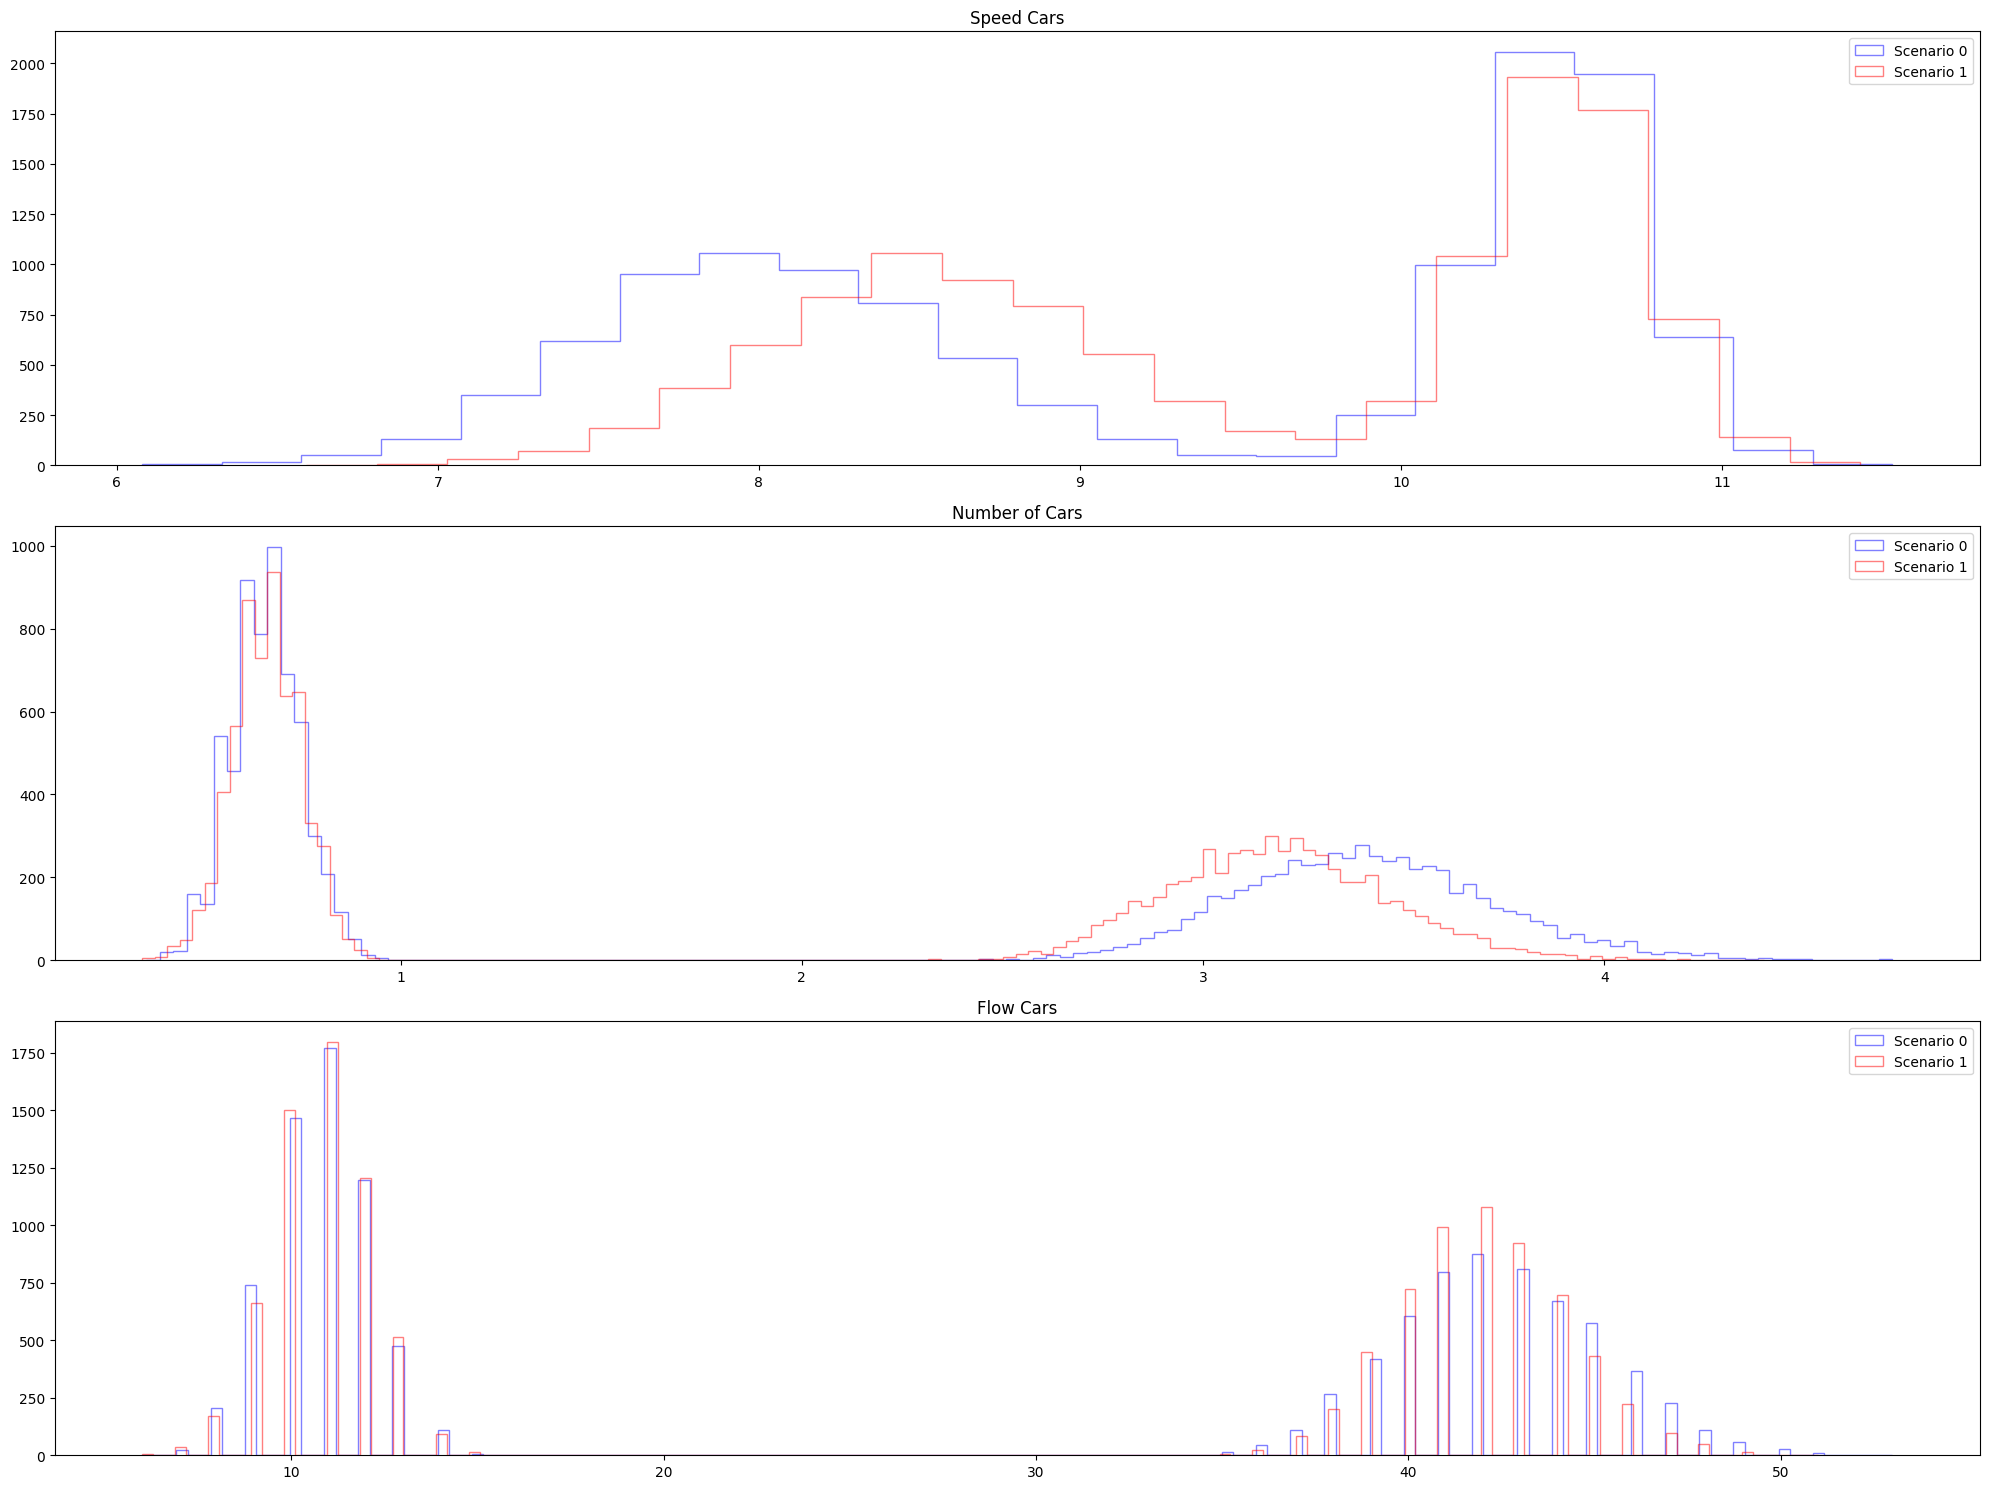

In [25]:
plot_histograms_francia(francia_s0, francia_s1)

In [26]:
def produce_sequences(s0, s1, T):
    """
    Shuffles the samples (columns) of s0 and s1, then produces 3 outputs: tr_data, sequence0, and sequence1.

    Args:
        s0: The first input sequence (NumPy array) of shape (m, n).
        s1: The second input sequence (NumPy array) of shape (m, n).
        T: The number of samples to include in tr_data.

    Returns:
        A tuple containing:
        - tr_data: The first T shuffled samples from s0 (shape (T, m)).
        - sequence0: The remaining samples from s0 (shape (n-T, m)).
        - sequence1: The fully shuffled s1 (shape (n, m)).
    """

    # Shuffle samples (columns) within s0 and s1
    shuffled_indices = np.random.permutation(s0.shape[1])  # Generate shuffled indices
    s0 = s0[:, shuffled_indices]  # Shuffle columns (samples) in s0
    s1 = s1[:, shuffled_indices]  # Shuffle columns (samples) in s1

    # Ensure T does not exceed available samples
    T = min(T, s0.shape[1])

    # Split s0 into tr_data (first T samples) and sequence0 (remaining samples)
    tr_data = s0[:, :T].T  # Shape (T, m)
    sequence0 = s0[:, T:].T  # Shape (n-T, m)

    # sequence1 is just the shuffled s1, transposed to (n, m)
    sequence1 = s1.T  # Shape (n, m)

    return tr_data, sequence0, sequence1


In [27]:
def run_experiments_qtewma(scenario_0, scenario_1, N, ARL_0):
  methods = ["QT-EWMA"]
  # --- Parameters
  n_exp = 1000                    # number of iterations of the detection experiment
  # QT-EWMA params
  K = 32                          # number of bins of the QuantTree histogram
  lam = 0.03                      # lambda parameter of QT-EWMA
  # regarding our data
  cp = 0                          # change point

  detection_times = {method: np.zeros(n_exp) for method in methods}  # to compute the ARL_0
  stopping_times = {method: np.zeros(n_exp) for method in methods}  # to compute the detection delay

  for j in range(n_exp):
    tr_data, sequence0, sequence1 = produce_sequences(scenario_0, scenario_1, N)

    # --- Training and monitoring
    # QT-EWMA
    qtewma = QT_EWMA(pi_values=K, transformation_type='none', ARL_0=ARL_0, lam=lam)
    # Training
    qtewma.train_model(tr_data)
    # Monitoring
    stopping_times['QT-EWMA'][j] = qtewma.monitor(sequence0)
    detection_times['QT-EWMA'][j] = qtewma.monitor(sequence1)

  for method in methods:
      tp = np.where(detection_times[method] >= cp)
      avg_detection_delay = np.mean(detection_times[method][tp] - cp)

      empirical_ARL = np.mean(stopping_times[method][stopping_times[method] != -1])

      data = [{'N': N, 'avg_detection_delay': avg_detection_delay, 'empirical_ARL': empirical_ARL, 'ARL_0': ARL_0}]
      return pd.DataFrame(data) # Pass the list of dictionaries to pd.DataFrame

In [28]:
N=[64,128,256]
ARL_0=[500, 1000]

In [31]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    results = run_experiments_qtewma(scenario_0, scenario_1, n, arl)

    if results_df is None or results_df.empty:
        results_df = results.copy()
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)
print("Poisson Multimodal, d=21")
print()
results_df

Poisson Multimodal, d=21



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,334.522,498.248,500
1,64,598.383,972.001,1000
2,128,277.476,473.473,500
3,128,533.293,1050.901,1000
4,256,249.582,506.117,500
5,256,445.559,1068.101,1000


In [32]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(up_s0, up_s1, n, arl)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Elicoidale Upstream, d=6")
print()
results_df

Elicoidale Upstream, d=6



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,469.710,485.499,500
1,64,910.008,985.450,1000
2,128,455.482,541.447,500
3,128,903.804,1002.898,1000
4,256,468.943,503.345,500
5,256,867.170,1035.558,1000


In [33]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(down_s0, down_s1, n, arl)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Elicoidale Downstream, d=6")
print()
results_df

Elicoidale Downstream, d=6



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,315.548,504.187,500
1,64,623.236,1032.299,1000
2,128,282.738,468.397,500
3,128,520.860,1021.206,1000
4,256,233.034,503.601,500
5,256,417.179,1010.646,1000


In [34]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    results = run_experiments_qtewma(lungomare_s0, lungomare_s1, n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Lungomare Canepa, d=6")
print()
results_df

Lungomare Canepa, d=6



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,520.930,511.483,500
1,64,1005.879,966.785,1000
2,128,514.409,508.707,500
3,128,987.871,1013.337,1000
4,256,515.943,525.503,500
5,256,1091.045,967.969,1000


In [35]:
results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])
for n in N:
  for arl in ARL_0:
    # Get the results from the function
    results = run_experiments_qtewma(francia_s0, francia_s1, n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Via di Francia, d=3")
print()
results_df

Via di Francia, d=3



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,131.903,483.358,500
1,64,241.124,997.914,1000
2,128,97.968,483.470,500
3,128,157.411,955.848,1000
4,256,84.181,490.496,500
5,256,113.074,1006.884,1000


In [36]:
poisson_array = np.random.poisson(lam=30, size=(21, 21000))
gauss = np.random.normal(loc=0, scale=1, size=(21, 12000))

print(poisson_array.shape)
print(gauss.shape)

(21, 21000)
(21, 12000)


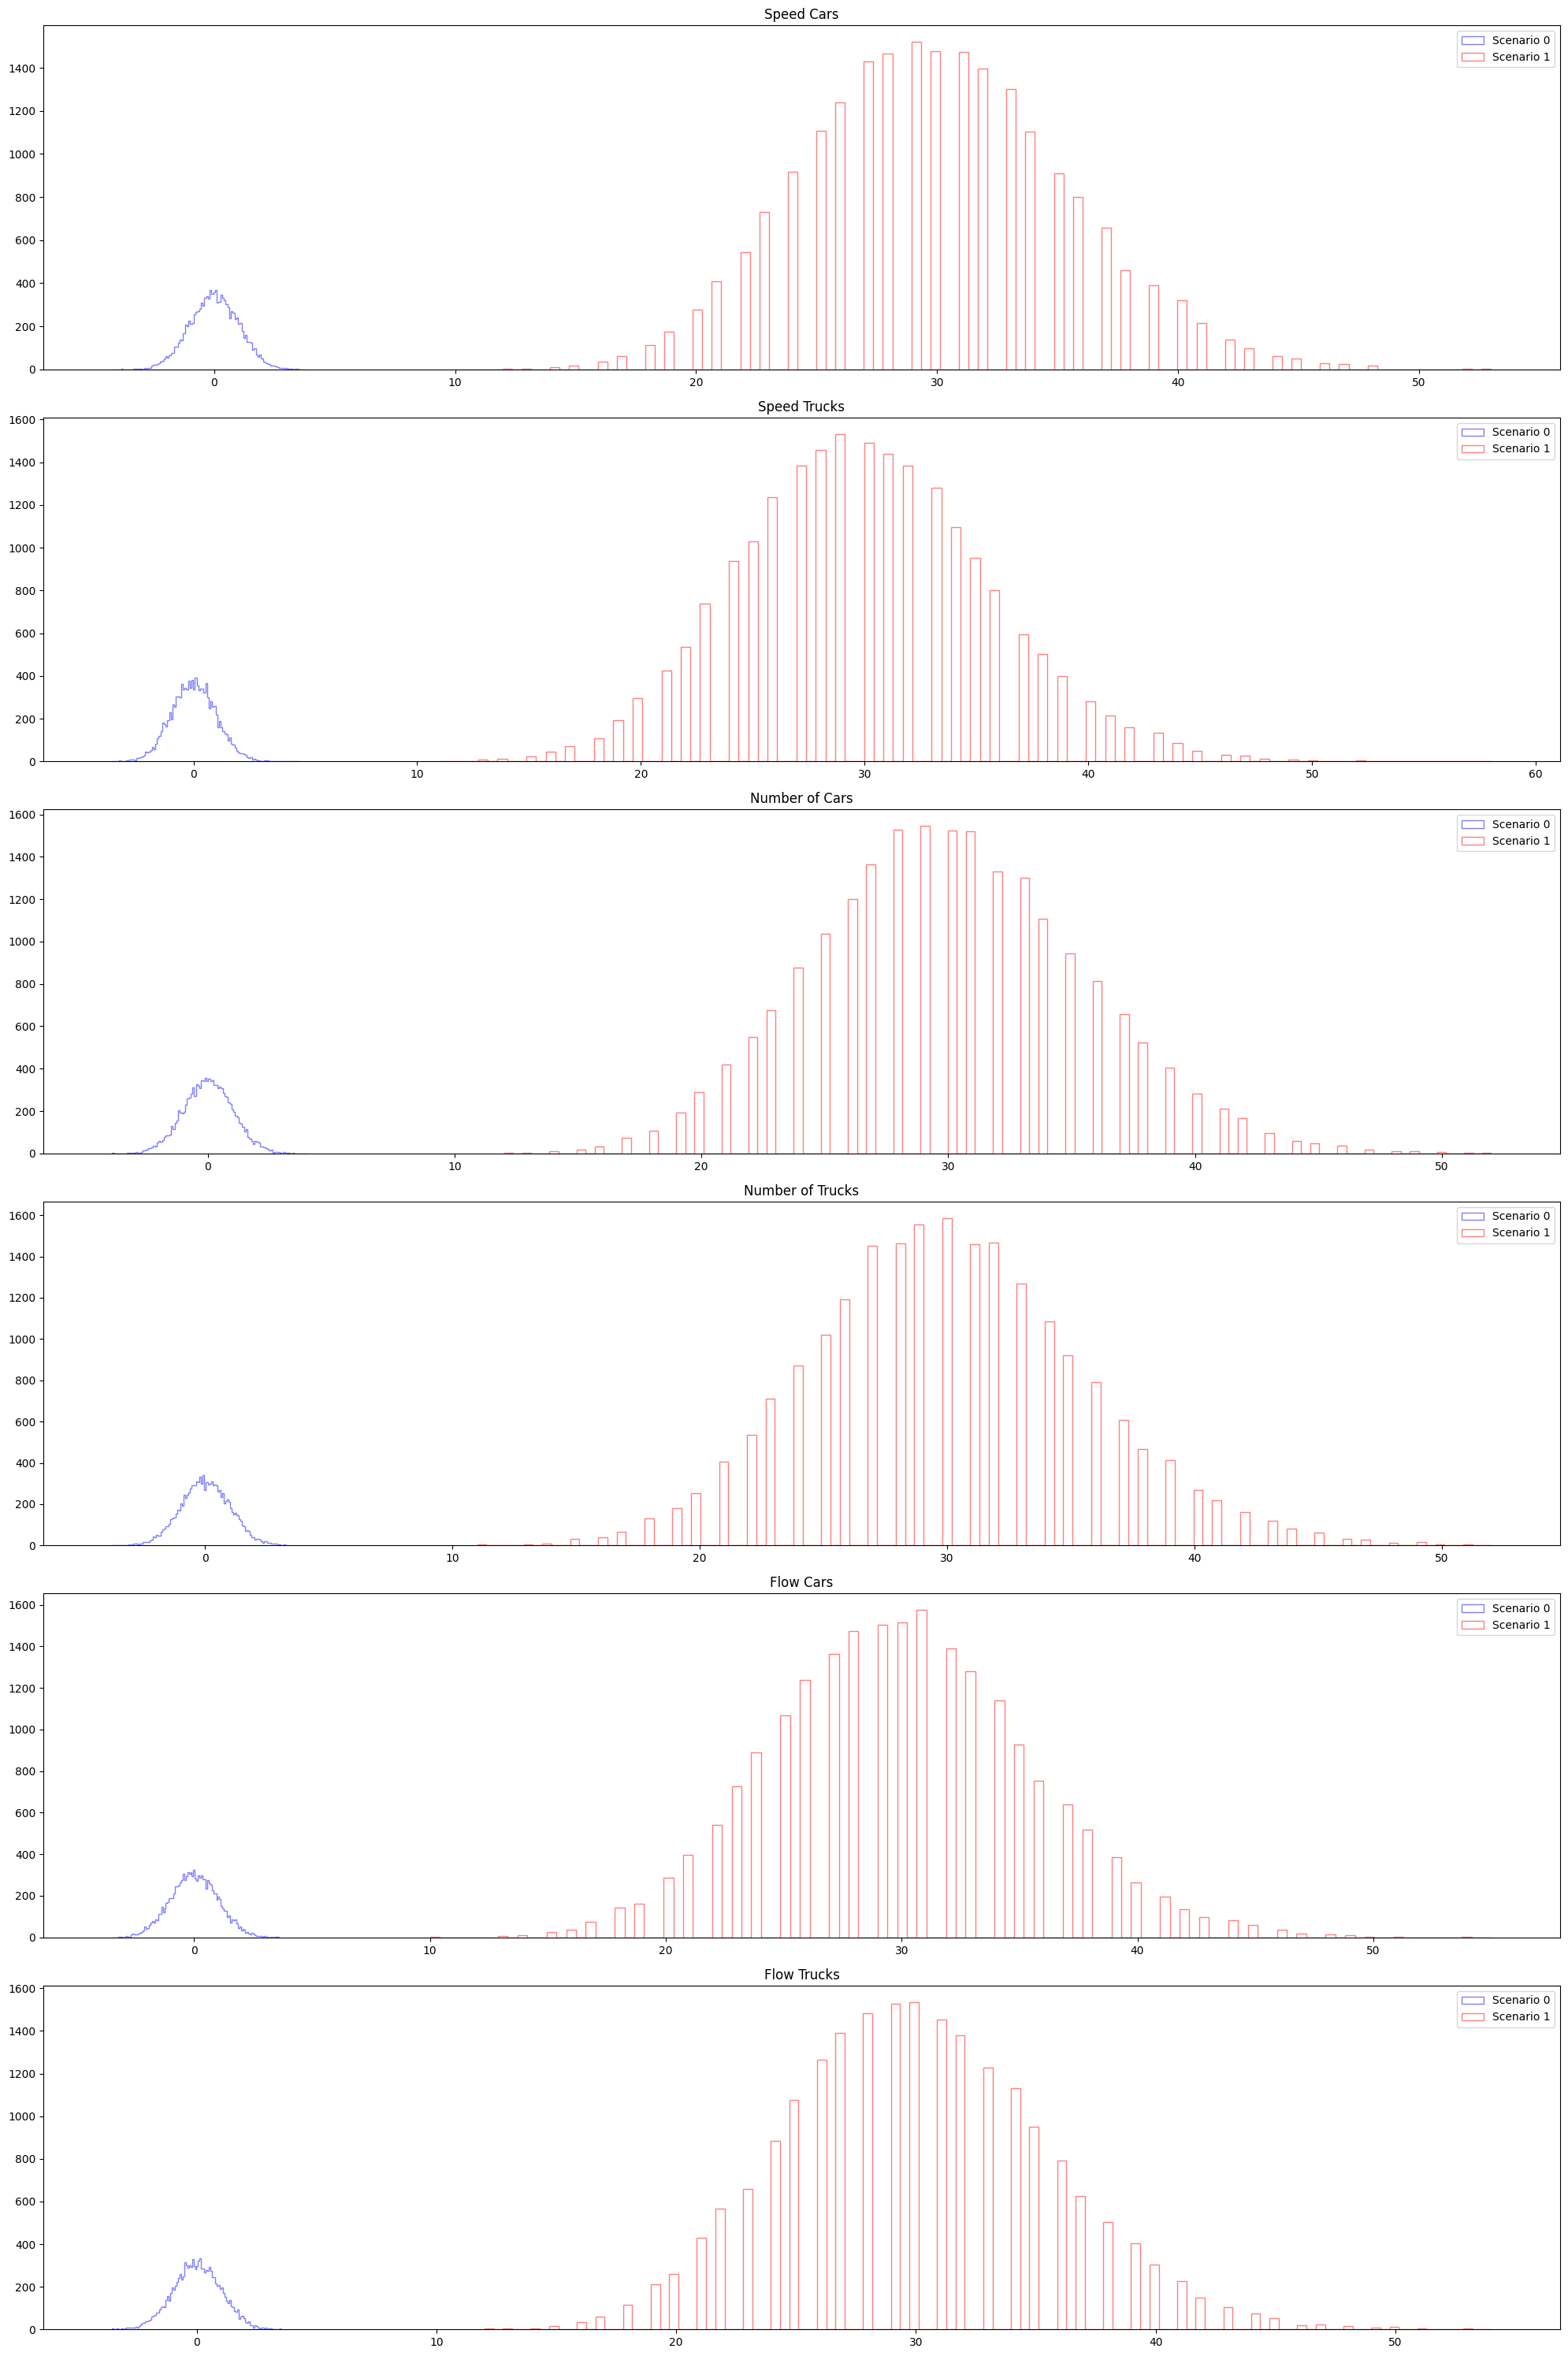

In [37]:
plot_histograms(gauss, poisson_array)

In [38]:
N=[64,128,256]
ARL_0=[500, 1000]

results_df = pd.DataFrame(columns=['N', 'avg_detection_delay', 'empirical_ARL', 'ARL_0'])


for n in N:
  for arl in ARL_0:
    results = run_experiments_qtewma(gauss, poisson_array, n, arl)
    # Create a temporary DataFrame for the result
    # Concatenate the temporary DataFrame with the main results DataFrame
    #print(results_df)
    if results_df is None or results_df.empty:
        results_df = results.copy()  # Avoid unnecessary concat
    else:
        results_df = pd.concat([results_df, results], ignore_index=True)

print("Sanity Check, d=21")
print()
results_df

Sanity Check, d=21



,N,avg_detection_delay,empirical_ARL,ARL_0
0,64,5.0,468.562,500
1,64,5.0,992.935,1000
2,128,5.0,488.683,500
3,128,5.0,1034.641,1000
4,256,5.0,474.013,500
5,256,5.0,1090.638,1000


In [40]:
%time run_experiments_qtewma(scenario_0, scenario_1, 256, 1000)

CPU times: user 31.3 s, sys: 601 ms, total: 31.9 s
Wall time: 37.9 s


,N,avg_detection_delay,empirical_ARL,ARL_0
0,256,461.115,992.044,1000
